## Results 3D_1.0.01 using grayscale ultrasound phantom data
## Display: ultrasound data plus thresholded, segmented, binary filtered data, with 3D rendering

Author: William (Rick) Weitzel, 2020, Revised 2021 <br>
For investigational use only and prepared for release under open source 3-clause BSD license (see code for full open source license) <br>
This work is partly supported by the US Dept of Veterans Affairs <br>

In [1]:
# Author: 2020 and 2021 William (Rick) Weitzel
# For investigational use only and prepared for release under open source 3-clause BSD license
# (BSD license) Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:
# Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.
# Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.
# Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE. 

In [2]:
# libraries for data plotting and interaction
import matplotlib.pyplot as plt
import numpy as np
import ipyvolume as ipv
import ipywidgets as widgets
from ipywidgets import interact

In [3]:
file_path = ''

In [4]:
usn_pixel_data = np.load(file_path + 'phantom_Y_crop_data.npy')
usn_binary_data = np.load(file_path + 'phantom_3D_seg_dil_1_close_5.npy')

In [5]:
shape = usn_pixel_data.shape
shape_binary = usn_binary_data.shape

In [6]:
# interactive plot of the ultrasound B-mode data
# master plot frame widget m_plot_frame
usn_pixel_data_used = usn_pixel_data[5:75,:,:]
def m_plot_frame(frame_number):
    plt.imshow(usn_pixel_data_used[frame_number,:,:], cmap='gray')
    plt.title('ultrasound B-mode data', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')
    return 
widgets.Label(value='ultrasound data')
description_wider = {'description_width': 'initial'}
interact(m_plot_frame,
         frame_number=widgets.IntSlider(value=0,\
    min=0, max=len(usn_pixel_data_used)-1, step=1,description='frame number',\
    continuous_update=False, style=description_wider),
        );

interactive(children=(IntSlider(value=0, continuous_update=False, description='frame number', max=69, style=Sl…

In [7]:
# now let's examine the filtered vessel segment interactively 
usn_binary_data_used = usn_binary_data[5:75,:,:]
def plot_vessel_segment(frame_number):
    frame = usn_binary_data_used[frame_number,:,:]
    plt.imshow(frame, cmap='gray')
    plt.title('vessel segment data', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')

description_wider = {'description_width': 'initial'}
interact(plot_vessel_segment, frame_number=widgets.IntSlider(min=0, 
    max=len(usn_binary_data_used)-1, step=1,value=0, continuous_update=False,
    style=description_wider));

interactive(children=(IntSlider(value=0, continuous_update=False, description='frame_number', max=69, style=Sl…

In [8]:
# select range for sono-tomogram
sono_tomo_data = usn_binary_data[:,25:120,:]

In [9]:
z_max, y_max, x_max = sono_tomo_data.shape

(80, 95, 570)

In [10]:
sono_tomo_dataT = sono_tomo_data.T

In [11]:
# tomogram (sono-tomogram) t_plot_frame
# examine slices along the y-axis in this coordinate system

def t_plot_frame(top_view_slice):
    frame = sono_tomo_dataT[:,top_view_slice,:]
    plt.imshow(frame, cmap='gray', aspect=0.05)
    plt.title('ultrasound tomography "top view" data', loc='center')
    plt.xlabel('pixels')
    plt.ylabel('pixels')

description_wider = {'description_width': 'initial'}
interact(t_plot_frame, top_view_slice=widgets.IntSlider(min=0, 
    max=y_max-1, step=1,value=0, continuous_update=False,
    style=description_wider));

interactive(children=(IntSlider(value=0, continuous_update=False, description='top_view_slice', max=94, style=…

In [12]:
# Next: sum up the image - like a 2D fistulogram - along this axis
# invert the result to make display similar to the angiogram
result = np.sum(sono_tomo_dataT[:,:,:], axis = 1)
result_inv = 255 - result

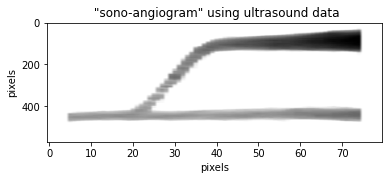

In [13]:
plt.imshow(result_inv, aspect = 0.05, cmap='gray');
plt.title(' "sono-angiogram" using ultrasound data', loc='center');
plt.xlabel('pixels');
plt.ylabel('pixels');

In [14]:
# flip data: obtain proper orientation for display
data_flip_y = np.flip(usn_binary_data, axis=1)
data_flip_x = np.flip(data_flip_y, axis=2)
data_flip = data_flip_x

In [15]:
# need to pad the data depending on cropping and image scale
zero_pad_data = np.pad(data_flip, (300,300), \
                       mode='constant', constant_values = (0,0))

In [16]:
trim_zero_pad = zero_pad_data[300:380,:,:] #for Y-shaped phantom 80 frames

In [17]:
# V = data_flip
V = trim_zero_pad
ipv.figure()
ipv.volshow(V, level=[0.45, 0.75], opacity=0.1, level_width=0.1, data_min=0, data_max=1)
ipv.view(-80,20)
ipv.show()

/Users/rick/Projects/resrch_voila_3D_phantom_1.0/env/lib/python3.9/site-packages/ipyvolume/widgets.py:179: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_view = self.data_original[view]
/Users/rick/Projects/resrch_voila_3D_phantom_1.0/env/lib/python3.9/site-packages/ipyvolume/utils.py:204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = (data[slices1] + data[slices2])/2
/Users/rick/Projects/resrch_voila_3D_phantom_1.0/env/lib/python3.9/site-packages/ipyvolume/serialize.py:81: RuntimeWarning: invalid value encountered in true_divi